In [1]:
import numpy as np
import pandas as  pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense, Dropout
import keras

Using TensorFlow backend.


In [2]:
import import_ipynb
import Part1
from Part1 import norm_df

importing Jupyter notebook from Part1.ipynb


In [42]:
#Without outliers from Isolation Forest
norm_df

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class,classNum,outlier,outlier2,outComb
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT,3,1,1,2
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT,3,1,1,2
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT,3,1,1,2
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC,2,1,1,2
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2,5,1,1,2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC,2,1,1,2
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2,5,1,1,2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC,2,1,1,2


In [255]:
class loggingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.biases = []
        self.w1 = []
        self.w2 = []
        self.w3 = []

    def on_epoch_end(self, batch, logs={}):
        #biases in 1. 0 for CYT class
        biases = model.layers[2].get_weights()[1][0]
        #this node to 0 in next layer for CYT Class
        w1 = model.layers[2].get_weights()[0][0][0]
        w2 = model.layers[2].get_weights()[0][1][0]
        w3 = model.layers[2].get_weights()[0][2][0]
        self.biases.append(biases)
        self.w1.append(w1)
        self.w2.append(w2)
        self.w3.append(w3)
my_loggingCallback = loggingCallback()

In [256]:
#Get [X,Y] and shuffle
X = norm_df.values
X = X[:,0:8]
Y = norm_df.classNum.values.reshape(len(X),1) 
Y = Y - 1

In [257]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.34, random_state=42)

In [258]:
def model(): 
    model = Sequential([
        Dense(3, activation='sigmoid', input_shape=(8,), name="hidden1", use_bias=True),
        Dense(3, activation='sigmoid', use_bias=True, name="hidden2"),
        Dense(10, activation='sigmoid', use_bias=True, name="output"),
    ])
    sgd = keras.optimizers.SGD(lr=0.01)
    model.compile(
      optimizer=sgd,
      loss='mean_squared_error',
      metrics=['accuracy'],
    )
    return model

In [259]:
model = model()


In [260]:
history = model.fit(
    x=X_train,
    y=to_categorical(Y_train, num_classes= 10),
    epochs=100,
    batch_size=1,
    validation_split=0,
    validation_data=(X_test,to_categorical(Y_test, num_classes= 10)),
    verbose=1,
    callbacks=[my_loggingCallback]
)

Train on 881 samples, validate on 454 samples
Epoch 1/100
881/881 [==============================] - 2s 2ms/step - loss: 0.2316 - accuracy: 0.0057 - val_loss: 0.1994 - val_accuracy: 0.0000e+00
Epoch 2/100
881/881 [==============================] - 1s 1ms/step - loss: 0.1765 - accuracy: 0.0057 - val_loss: 0.1568 - val_accuracy: 0.0000e+00
Epoch 3/100
881/881 [==============================] - 1s 1ms/step - loss: 0.1433 - accuracy: 0.2009 - val_loss: 0.1313 - val_accuracy: 0.3062
Epoch 4/100
881/881 [==============================] - 1s 1ms/step - loss: 0.1234 - accuracy: 0.2826 - val_loss: 0.1158 - val_accuracy: 0.3062
Epoch 5/100
881/881 [==============================] - 1s 1ms/step - loss: 0.1110 - accuracy: 0.2826 - val_loss: 0.1060 - val_accuracy: 0.3062
Epoch 6/100
881/881 [==============================] - 1s 1ms/step - loss: 0.1029 - accuracy: 0.2894 - val_loss: 0.0994 - val_accuracy: 0.3128
Epoch 7/100
881/881 [==============================] - 1s 2ms/step - loss: 0.0975 - accu

881/881 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.3178 - val_loss: 0.0776 - val_accuracy: 0.3128
Epoch 58/100
881/881 [==============================] - 1s 1ms/step - loss: 0.0784 - accuracy: 0.3178 - val_loss: 0.0776 - val_accuracy: 0.3128
Epoch 59/100
881/881 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.3178 - val_loss: 0.0775 - val_accuracy: 0.3128
Epoch 60/100
881/881 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.3178 - val_loss: 0.0775 - val_accuracy: 0.3128
Epoch 61/100
881/881 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.3178 - val_loss: 0.0775 - val_accuracy: 0.3128
Epoch 62/100
881/881 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.3178 - val_loss: 0.0775 - val_accuracy: 0.3128
Epoch 63/100
881/881 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.3178 - val_loss: 0.0775 - val_accuracy: 0.3128
Epoch

In [261]:
model.evaluate(
  X_test,
  to_categorical(Y_test,num_classes= 10)
)

454/454 [==============================] - 0s 45us/step


[0.07715357347732073, 0.3127753436565399]

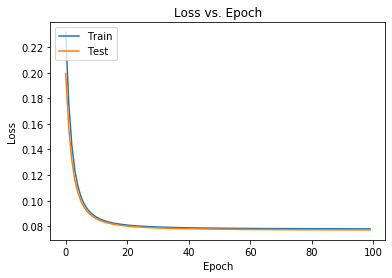

In [262]:
#From keras website
# PLOT Training and test loss per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [263]:
#PLOT train and test accuracy 
error = 1 - np.array(history.history['accuracy'])
error_train = np.reshape(error, [len(error),1])
error2 = 1 - np.array(history.history['val_accuracy'])
error_test = np.reshape(error2, [len(error2),1])

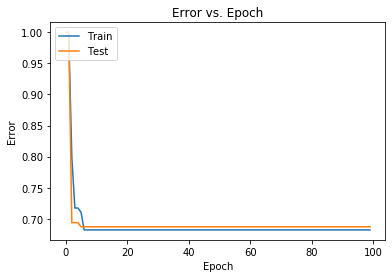

In [264]:
plt.plot(error_train)
plt.plot(error_test)
plt.title('Error vs. Epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

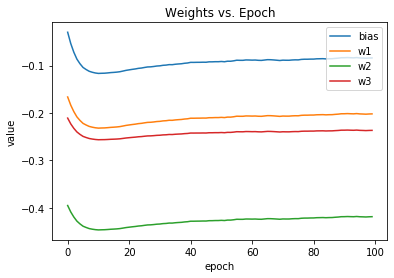

In [265]:
#PLOT weights done 
bias_label, = plt.plot(my_loggingCallback.biases, label='bias')
w1_label, = plt.plot(my_loggingCallback.w1, label='w1')
w2_label, = plt.plot(my_loggingCallback.w2, label='w2')
w3_label, = plt.plot(my_loggingCallback.w3, label='w3')
plt.title('Weights vs. Epoch')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend(handles=[bias_label, w1_label, w2_label, w3_label])
plt.show()

In [266]:
result = model.evaluate(
  X,
  to_categorical(Y,num_classes= 10)
)

error = 1 - result[1]
error

1335/1335 [==============================] - 0s 32us/step


0.6838951408863068

In [267]:
model.layers[2].get_weights()[0][2]

array([-0.23665552,  0.380919  , -0.6231389 , -0.2108461 , -0.30237216,
       -0.1833936 , -1.1238273 , -0.3967098 , -0.84122074, -0.6561288 ],
      dtype=float32)

In [268]:
model.layers[0].get_config()

{'name': 'hidden1',
 'trainable': True,
 'batch_input_shape': (None, 8),
 'dtype': 'float32',
 'units': 3,
 'activation': 'sigmoid',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [269]:
model.layers[2].get_weights()[0].shape

(3, 10)

In [270]:
np.array(my_loggingCallback.w3).shape

(100,)